<div style="text-align:center; font-size: 30px">FEATURE AGGREGATION</div>

In [1]:
# Import libraries
import numpy as np
import pandas as pd

from glob import glob

import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.stats import skew, kurtosis

In [2]:
# Paths to variables
blues_files = glob("../audio-ml/Data/genres_original/blues/blues.*.wav")

classical_files = glob("../audio-ml/Data/genres_original/classical/classical.*.wav")

country_files = glob("../audio-ml/Data/genres_original/country/country.*.wav")

disco_files = glob("../audio-ml/Data/genres_original/disco/disco.*.wav")

hiphop_files = glob("../audio-ml/Data/genres_original/hiphop/hiphop.*.wav")

jazz_files = glob("../audio-ml/Data/genres_original/jazz/jazz.*.wav")

metal_files = glob("../audio-ml/Data/genres_original/metal/metal.*.wav")

pop_files = glob("../audio-ml/Data/genres_original/pop/pop.*.wav")

reggae_files = glob("../audio-ml/Data/genres_original/reggae/reggae.*.wav")

rock_files = glob("../audio-ml/Data/genres_original/rock/rock.*.wav")

In [3]:
# Feature extraction function
def extract_features(audio_path):
    # Load file
    y, _ = librosa.load(audio_path)
    
    # Initialize feature dict
    features = {}
    
    # Calculate RMS Energy and extract features
    rms = librosa.feature.rms(y=y, frame_length=2048, hop_length=512)[0]
    features["rms_mean"] = np.mean(rms)
    features["rms_std"] = np.std(rms)
    # features["rms_max"] = np.max(rms)
    # features["rms_min"] = np.min(rms)
    # features["rms_skew"] = skew(rms)
    # features["rms_kurtosis"] = kurtosis(rms)
    
    # Calculate Zero Crossing Rate and extract features
    zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=2048, hop_length=512)[0]
    features["zcr_mean"] = np.mean(zcr)
    features["zcr_std"] = np.std(zcr)
    # features["zcr_max"] = np.max(zcr)
    # features["zcr_min"] = np.min(zcr)
    # features["zcr_skew"] = skew(zcr)
    # features["zcr_kurtosis"] = kurtosis(zcr)  
    
    # Calculate Spectral Centroids and extract features
    centroids = librosa.feature.spectral_centroid(y=y, n_fft=2048, hop_length=512)[0]
    features["centroid_mean"] = np.mean(centroids)
    features["centroid_std"] = np.std(centroids)
    # features["centroid_max"] = np.max(centroid)
    # features["centroid_min"] = np.min(centroid)
    # features["centroid_skew"] = skew(centroid)
    # features["centroid_kurtosis"] = kurtosis(centroid)
    
    # Calculate Spectral Bandwidth and extract features
    bandwidth = librosa.feature.spectral_bandwidth(y=y, n_fft=2048, hop_length=512)[0]
    features["bandwidth_mean"] = np.mean(bandwidth)
    features["bandwidth_std"] = np.std(bandwidth)
    # features["bandwidth_max"] = np.max(bandwidth)
    # features["bandwidth_min"] = np.min(bandwidth)
    # features["bandwidth_skew"] = skew(bandwidth)
    # features["bandwidth_kurtosis"] = kurtosis(bandwidth) 
    
    # Calculate Spectral Contrast and extract features
    contrast = librosa.feature.spectral_contrast(y=y, n_fft=2048, hop_length=512)
    # For each band
    for i, band in enumerate(contrast):
        features[f"contrast_band_{i}_mean"] = np.mean(band)
        features[f"contrast_band_{i}_std"] = np.std(band)
        # features[f"contrast_band_{i}_max"] = np.max(band)
        # features[f"contrast_band_{i}_min"] = np.min(band)
        # features[f"contrast_band_{i}_skew"] = skew(band)
        # features[f"contrast_band_{i}_kurtosis"] = kurtosis(band)  
    
    # Calculate Spectral Rolloff and extract features
    rolloff = librosa.feature.spectral_rolloff(y=y, n_fft=2048, hop_length=512)[0]
    features["rolloff_mean"] = np.mean(rolloff)
    features["rolloff_std"] = np.std(rolloff)
    # features["rolloff_max"] = np.max(rolloff)
    # features["rolloff_min"] = np.min(rolloff)
    # features["rolloff_skew"] = skew(rolloff)
    # features["rolloff_kurtosis"] = kurtosis(rolloff)

    # Calculate MFCCs and extract features
    mfcc = librosa.feature.mfcc(y=y, sr=22050, n_mfcc=13, hop_length=512, n_fft=2048, n_mels=128)
    features["mfcc_mean"] = np.mean(mfcc, axis=1)
    features["mfcc_std"] = np.std(mfcc, axis=1)
    return features

In [4]:
# Extract pop features
feat_pop = extract_features(pop_files[1])
feat_pop

{'rms_mean': np.float32(0.23100165),
 'rms_std': np.float32(0.12734859),
 'zcr_mean': np.float64(0.21382753589037123),
 'zcr_std': np.float64(0.11607546270493543),
 'centroid_mean': np.float64(4036.598130555536),
 'centroid_std': np.float64(1137.4545236791337),
 'bandwidth_mean': np.float64(3342.1673492869427),
 'bandwidth_std': np.float64(329.3525059564205),
 'contrast_band_0_mean': np.float64(19.382204719134474),
 'contrast_band_0_std': np.float64(5.271707070956617),
 'contrast_band_1_mean': np.float64(14.836270049456912),
 'contrast_band_1_std': np.float64(5.524162217560609),
 'contrast_band_2_mean': np.float64(17.398081622213965),
 'contrast_band_2_std': np.float64(6.122015285664537),
 'contrast_band_3_mean': np.float64(17.985195341051035),
 'contrast_band_3_std': np.float64(4.897074113390851),
 'contrast_band_4_mean': np.float64(17.99529589206183),
 'contrast_band_4_std': np.float64(4.031688781214258),
 'contrast_band_5_mean': np.float64(17.72378018609395),
 'contrast_band_5_std':

In [5]:
# Extract hiphop features
feat_hiphop = extract_features(hiphop_files[1])
feat_hiphop

{'rms_mean': np.float32(0.09347894),
 'rms_std': np.float32(0.033537157),
 'zcr_mean': np.float64(0.05871157192575406),
 'zcr_std': np.float64(0.049811052666069396),
 'centroid_mean': np.float64(1490.683575771141),
 'centroid_std': np.float64(795.9721712640174),
 'bandwidth_mean': np.float64(1910.490628858794),
 'bandwidth_std': np.float64(483.2868362584592),
 'contrast_band_0_mean': np.float64(22.483702494342467),
 'contrast_band_0_std': np.float64(3.8698039371823527),
 'contrast_band_1_mean': np.float64(14.545301655872798),
 'contrast_band_1_std': np.float64(4.540613067160945),
 'contrast_band_2_mean': np.float64(18.53652584658532),
 'contrast_band_2_std': np.float64(4.848147717906837),
 'contrast_band_3_mean': np.float64(17.67903822001245),
 'contrast_band_3_std': np.float64(4.6663139843688155),
 'contrast_band_4_mean': np.float64(16.443353776241175),
 'contrast_band_4_std': np.float64(3.3159808311541896),
 'contrast_band_5_mean': np.float64(17.25305592711395),
 'contrast_band_5_std

In [6]:
# Extract jazz features
feat_jazz = extract_features(jazz_files[1])
feat_jazz

{'rms_mean': np.float32(0.06982318),
 'rms_std': np.float32(0.019665185),
 'zcr_mean': np.float64(0.1078452031370843),
 'zcr_std': np.float64(0.03714863099412002),
 'centroid_mean': np.float64(2634.043115077565),
 'centroid_std': np.float64(600.744976523698),
 'bandwidth_mean': np.float64(2728.2919813424173),
 'bandwidth_std': np.float64(344.4335082412888),
 'contrast_band_0_mean': np.float64(23.06617145285719),
 'contrast_band_0_std': np.float64(5.310432542315146),
 'contrast_band_1_mean': np.float64(17.000100425296594),
 'contrast_band_1_std': np.float64(4.09752775927054),
 'contrast_band_2_mean': np.float64(22.09848500553943),
 'contrast_band_2_std': np.float64(4.6635639352430776),
 'contrast_band_3_mean': np.float64(22.164627147891583),
 'contrast_band_3_std': np.float64(4.513361475415093),
 'contrast_band_4_mean': np.float64(21.080554084686867),
 'contrast_band_4_std': np.float64(3.812339729045885),
 'contrast_band_5_mean': np.float64(19.925434934320922),
 'contrast_band_5_std': n

<div style="text-align:center; font-size: 30px">MEL-FREQUENCY CEPSTRAL COEFFICIENTS(MFCCs)</div>

**SUMMARY OF MFCCs PROCESS**

<img src="./images/MFCCs-process.png" width=800>

In [7]:
# Plot MFCCs function
def plot_mfccs(audiopath, genre):
    # Load file
    y, sr = librosa.load(audiopath, sr=22050)
    # Initialize MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048, n_mels=128)
    # Plot
    plt.figure(figsize=(15, 6))
    librosa.display.specshow(mfcc, x_axis="time", sr=sr)
    plt.title(f"{genre.title()} MFCCs")
    plt.colorbar().set_label("MFCC Magnitude")
    plt.ylabel("MFCC index")
    plt.tight_layout()
    plt.show()
    # Summary Stats
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)

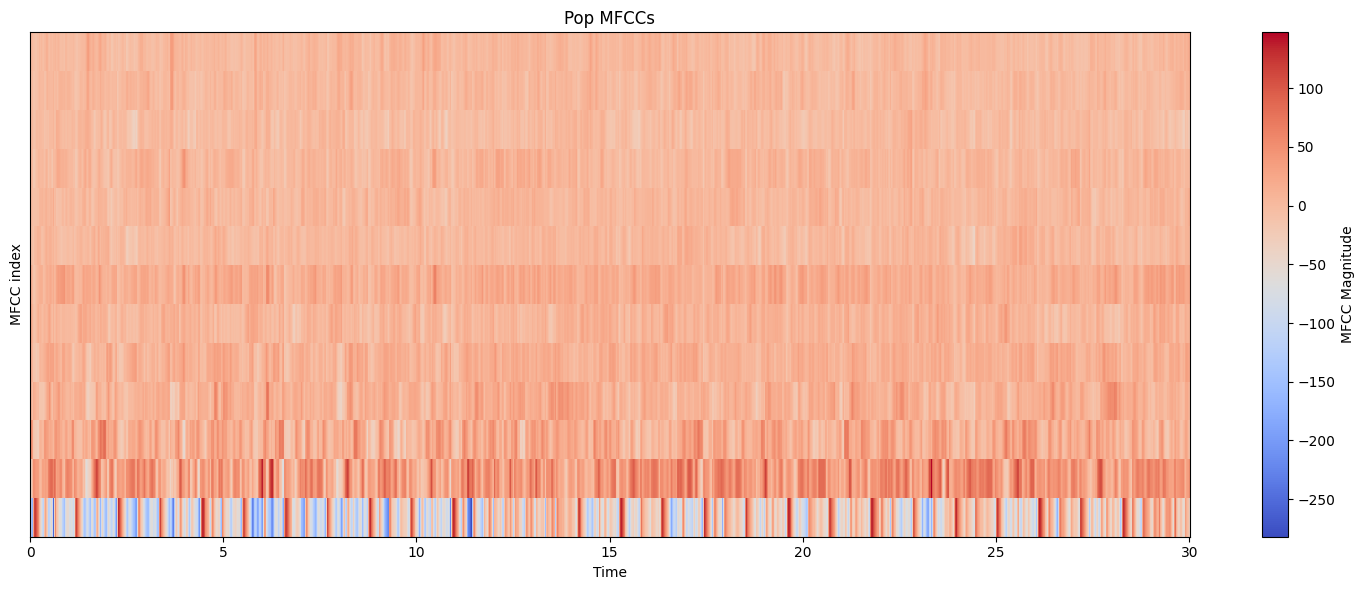

In [8]:
# Plot Pop MFCCs
plot_mfccs(audiopath=pop_files[1], genre="Pop")

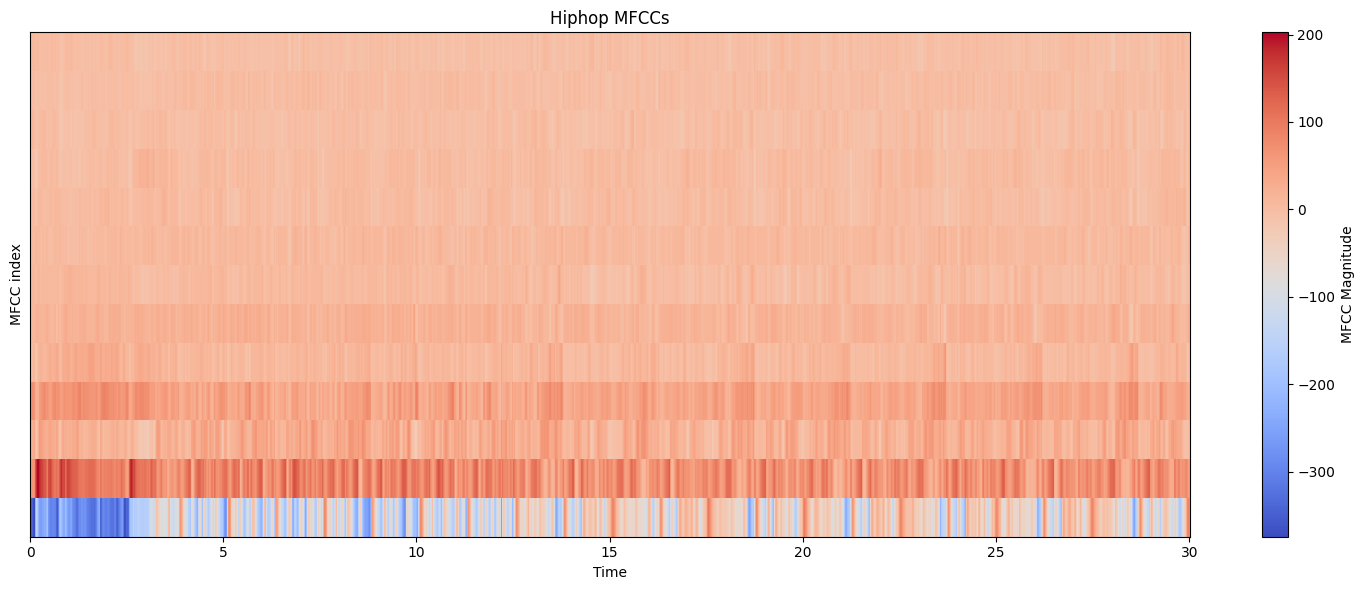

In [9]:
# Plot Hiphop MFCCs
plot_mfccs(audiopath=hiphop_files[0], genre="Hiphop")

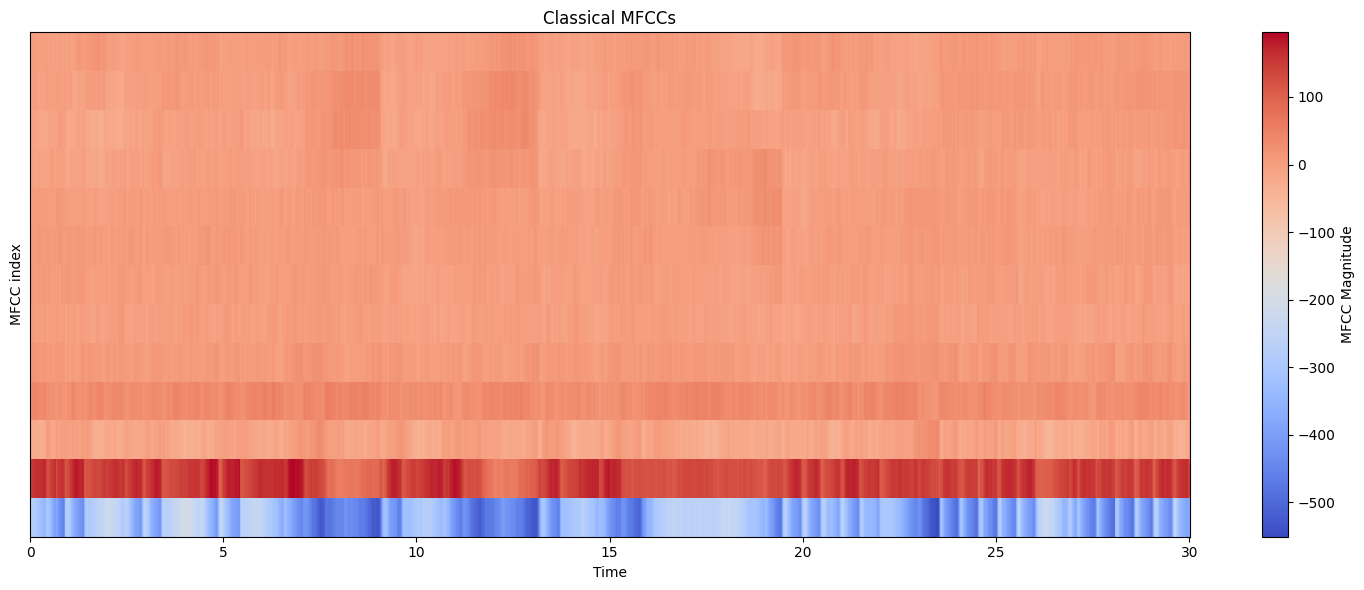

In [10]:
# Plot Classical MFCCs
plot_mfccs(audiopath=classical_files[0], genre="Classical")

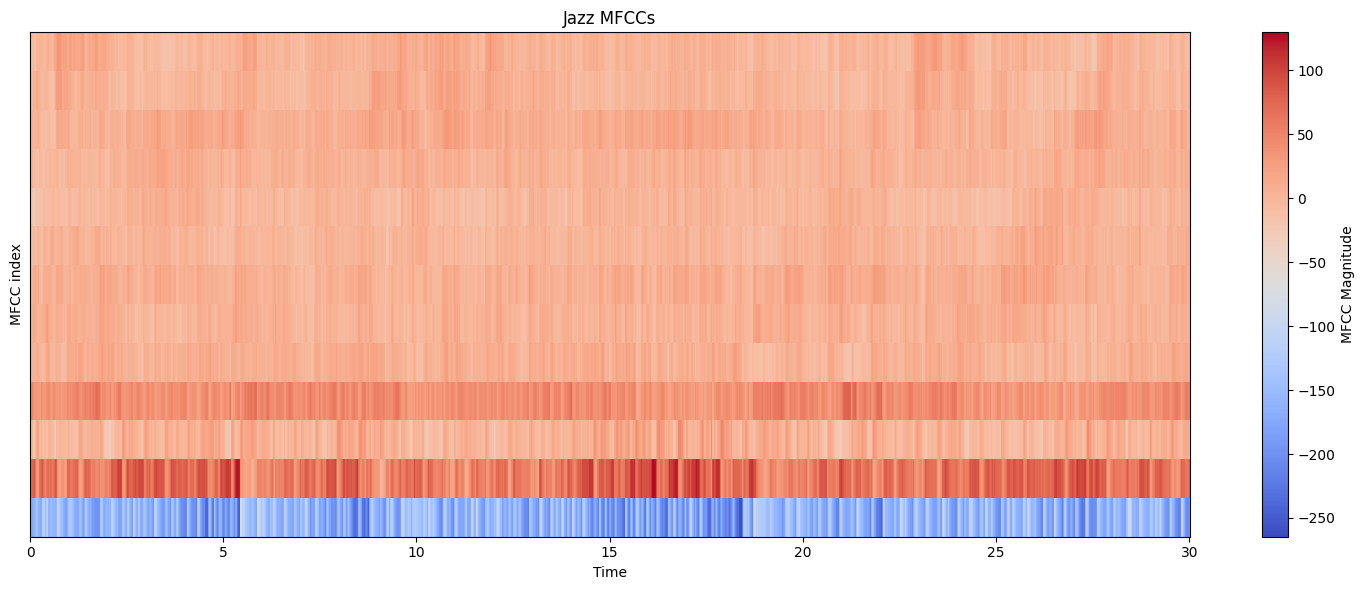

In [11]:
# Plot Jazz MFCCs
plot_mfccs(audiopath=jazz_files[1], genre="Jazz")

**Notes**
- I've tried different audio files of same genre. Noticed that the pattern is similar on every file
- Patterns are unique to every genre
- In a genre, although some are to an extreme, the patterns are generally the same